# Tutorial for Simple Classification Model
Author: Dr Ambikesh Jayal, ajayal@cardiffmet.ac.uk
Web: https://sites.google.com/site/ambi1999/main
Github: https://github.com/ambi1999

**Code used in tutorial is available from link below:**

https://colab.research.google.com/drive/1MYKgyJcpp_GKUZ5kRVAHJRVXmuYf9fhU?usp=sharing


# **Step 1:** Reading data using Pandas dataframe
# **Step 2:** Data Cleaning
# **Step 3:** Data Exploration
# **Step 4:** Feature Selection
# **Step 5:** Split into Training and Testing set 
# **Step 5:** Build Model
# **Step 6:** Check performance of the model on testing and traning set 
(Please note that the performance will always be higher in training set, the real measure of is performance of model in testing set)


# Below are some useful links

# 1. Pands Cheatsheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
2. Details about Pandas: https://pandas.pydata.org/docs/user_guide/index.html
3. Details about RandomForestRegressor used in regression
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
4. Details about RandomForestClassifier used in classification
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
5. View .dot tree file at https://dreampuf.github.io/GraphvizOnline

In [ ]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np

#Reading data from url
url="https://raw.githubusercontent.com/ambi1999/mldataset/main/Boston_housing_dataset_generic_modified_by_ambi/boston_housing_dataset_generic_modified_by_ambi.csv"
df = pd.read_csv(url)

#Reading data from csv, replace the mydata.csv with the full path name of your data file
#df=pd.read_csv("mydata.csv")

print(type(df))
print(df)

<class 'pandas.core.frame.DataFrame'>
        CRIM    ZN  INDUS  CHAS  ...  greenarea  internetfacility  MDEV  investmentrisk
0    0.00632  18.0   2.31     0  ...        low       fiberoptics  24.0          medium
1    0.02731   0.0   7.07     0  ...     medium       fiberoptics  21.6          medium
2    0.02729   0.0   7.07     0  ...       high             cable  34.7            high
3    0.03237   0.0   2.18     0  ...       high             cable  33.4            high
4    0.06905   0.0   2.18     0  ...        low             cable  36.2            high
..       ...   ...    ...   ...  ...        ...               ...   ...             ...
447  0.06263   0.0  11.93     0  ...       high             cable  22.4          medium
448  0.04527   0.0  11.93     0  ...       high             cable  20.6          medium
449  0.06076   0.0  11.93     0  ...        low             cable  23.9          medium
450  0.10959   0.0  11.93     0  ...        low       fiberoptics  22.0          m

In [ ]:
df.info()
print(df.columns)
print(df.index)
print(df.values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CRIM              452 non-null    float64
 1   ZN                452 non-null    float64
 2   INDUS             452 non-null    float64
 3   CHAS              452 non-null    int64  
 4   NOX               452 non-null    float64
 5   RM                452 non-null    float64
 6   AGE               452 non-null    float64
 7   DIS               452 non-null    float64
 8   RAD               452 non-null    int64  
 9   TAX               452 non-null    int64  
 10  PTRATIO           452 non-null    float64
 11  B                 452 non-null    float64
 12  LSTAT             452 non-null    float64
 13  greenarea         452 non-null    object 
 14  internetfacility  452 non-null    object 
 15  MDEV              452 non-null    float64
 16  investmentrisk    452 non-null    object 
dt

In [ ]:
#Data Cleaning

# Count number of missing values in each column
print(df.isnull().sum())

#Drop rows with missing values
df = df.dropna(axis=0)



CRIM                0
ZN                  0
INDUS               0
CHAS                0
NOX                 0
RM                  0
AGE                 0
DIS                 0
RAD                 0
TAX                 0
PTRATIO             0
B                   0
LSTAT               0
greenarea           0
internetfacility    0
MDEV                0
investmentrisk      0
dtype: int64


             CRIM          ZN       INDUS  ...           B       LSTAT        MDEV
count  452.000000  452.000000  452.000000  ...  452.000000  452.000000  452.000000
mean     1.420825   12.721239   10.304889  ...  369.826504   11.441881   23.750442
std      2.495894   24.326032    6.797103  ...   68.554439    6.156437    8.808602
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    6.300000
25%      0.069875    0.000000    4.930000  ...  377.717500    6.587500   18.500000
50%      0.191030    0.000000    8.140000  ...  392.080000   10.250000   21.950000
75%      1.211460   20.000000   18.100000  ...  396.157500   15.105000   26.600000
max      9.966540  100.000000   27.740000  ...  396.900000   34.410000   50.000000

[8 rows x 14 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7fe9312610>,
      dtype=object)

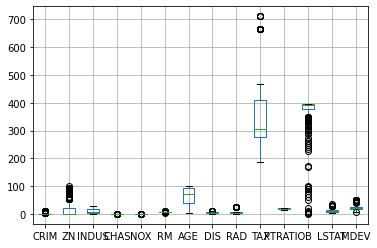

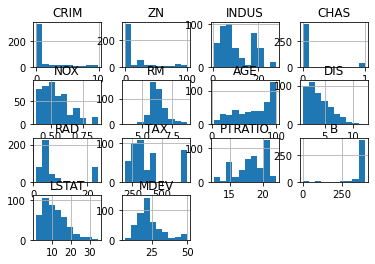

In [ ]:
#Data Exploration

print(df.describe())

#df.hist()

df.boxplot()

df.hist()


             CRIM        ZN     INDUS  ...         B     LSTAT      MDEV
CRIM     1.000000 -0.281239  0.573822  ... -0.413014  0.424789 -0.286245
ZN      -0.281239  1.000000 -0.514273  ...  0.150380 -0.411165  0.331570
INDUS    0.573822 -0.514273  1.000000  ... -0.316752  0.565402 -0.411915
CHAS     0.050066 -0.059697  0.103016  ...  0.013415 -0.009430  0.154409
NOX      0.636941 -0.500729  0.738517  ... -0.358433  0.536824 -0.332778
RM      -0.142458  0.306623 -0.364895  ...  0.108352 -0.607289  0.740181
AGE      0.447664 -0.555679  0.605982  ... -0.223765  0.573266 -0.299893
DIS     -0.461967  0.656152 -0.669362  ...  0.234449 -0.423725  0.138798
RAD      0.897988 -0.266606  0.513306  ... -0.352586  0.309788 -0.217902
TAX      0.825668 -0.269446  0.673312  ... -0.367084  0.410927 -0.345898
PTRATIO  0.319470 -0.364122  0.317336  ... -0.089609  0.303043 -0.461214
B       -0.413014  0.150380 -0.316752  ...  1.000000 -0.291094  0.264797
LSTAT    0.424789 -0.411165  0.565402  ... -0.29109

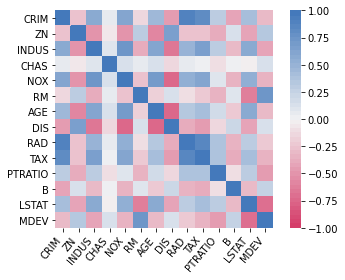

In [ ]:
#Data Exploration
import seaborn as sns

print(df.corr())
correlationMatrix=df.corr(method='pearson')
ax = sns.heatmap(
    correlationMatrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=50),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=50,
    horizontalalignment='right'
);

In [ ]:
#Feature Selection

#Create separate dataframe for all independed varialbes
#independent_variables=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'greenarea', 'internetfacility', 'MDEV', 'investmentrisk']
independent_variables=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT' ]
X = df[independent_variables]

print(type(X))
print(X)

#Create a Series for the target variable that we want to predict.
#Note: For Regression problems, target variable will be a continuous variable such as MDEV
#Note: For Classification problems, target variable will be a categorical variable such as investmentrisk
#target_variable='MDEV'
target_variable='investmentrisk'
y=df[target_variable]

print(type(y))
print(y)

# Convert to numpy array
X_numpy = np.array(X)
y_numpy=np.array(y)

print(type(X_numpy))
print(type(y_numpy))

<class 'pandas.core.frame.DataFrame'>
        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD  TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31     0  0.538  ...    1  296     15.3  396.90   4.98
1    0.02731   0.0   7.07     0  0.469  ...    2  242     17.8  396.90   9.14
2    0.02729   0.0   7.07     0  0.469  ...    2  242     17.8  392.83   4.03
3    0.03237   0.0   2.18     0  0.458  ...    3  222     18.7  394.63   2.94
4    0.06905   0.0   2.18     0  0.458  ...    3  222     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...  ...      ...     ...    ...
447  0.06263   0.0  11.93     0  0.573  ...    1  273     21.0  391.99   9.67
448  0.04527   0.0  11.93     0  0.573  ...    1  273     21.0  396.90   9.08
449  0.06076   0.0  11.93     0  0.573  ...    1  273     21.0  396.90   5.64
450  0.10959   0.0  11.93     0  0.573  ...    1  273     21.0  393.45   6.48
451  0.04741   0.0  11.93     0  0.573  ...    1  273     21.0  396.90   7.88

[452 rows x 13 columns]
<

In [ ]:
#Data Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_numpy, y_numpy, test_size=0.2, random_state=1)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

num_trees=5
#dt_model = RandomForestRegressor(random_state=1, max_depth= 8, max_samples=300, max_features=6, n_estimators=num_trees)
dt_model = RandomForestClassifier(random_state=1, max_depth= 12, max_samples=300, max_features=7, n_estimators=num_trees)



#Fit RandomForestRegressor model
dt_model.fit(X_train, y_train)

print("Making predictions for the following in train set:")
predicted_values=dt_model.predict(X_train[0:10,:])
true_values=y_train[0:10]
print("True values are ",true_values)
print("The predicted values are", predicted_values)
#print("Diff", predicted_values-true_values)

training_accuracy=accuracy_score(true_values, predicted_values, normalize=False)
print("Accuracy Score in Training set", training_accuracy)

print("Making predictions for the following in testing set:")
predicted_values=dt_model.predict(X_test[0:10,:])
true_values=y_test[0:10]
print("True values are ",true_values)
print("The predicted values are", predicted_values)
#print("Diff", predicted_values-true_values)


testing_accuracy=accuracy_score(true_values, predicted_values, normalize=False)
print("Accuracy Score in Testing set", testing_accuracy)

Making predictions for the following in train set:
True values are  ['medium' 'medium' 'low' 'medium' 'medium' 'medium' 'low' 'medium' 'low'
 'medium']
The predicted values are ['medium' 'medium' 'low' 'medium' 'medium' 'medium' 'low' 'medium' 'low'
 'medium']
Accuracy Score in Training set 10
Making predictions for the following in testing set:
True values are  ['medium' 'low' 'medium' 'high' 'medium' 'low' 'medium' 'low' 'medium'
 'medium']
The predicted values are ['low' 'low' 'medium' 'high' 'medium' 'low' 'medium' 'low' 'medium'
 'medium']
Accuracy Score in Testing set 9


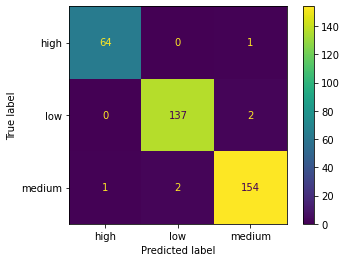

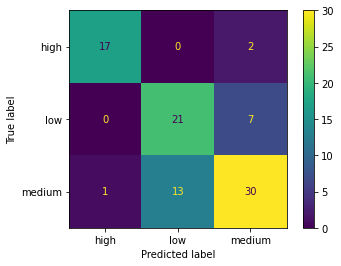

In [ ]:
#Plot confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

#Plot the confusion matrix for training data, include numbers in the plot
plot_confusion_matrix(dt_model, X_train, y_train, values_format="d")

#Plot the confusion matrix for testing data, include numbers in the plot
plot_confusion_matrix(dt_model, X_test, y_test)

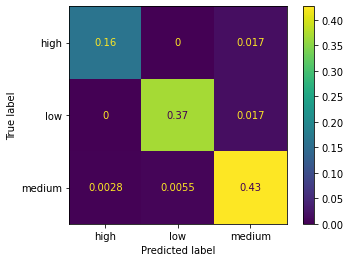

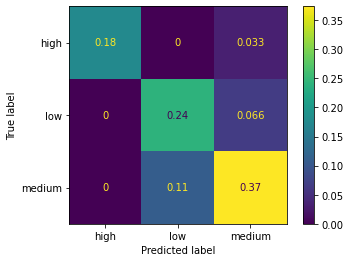

In [ ]:
#Plot confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

#Plot the confusion matrix for training data using percentage
plot_confusion_matrix(dt_model, X_train, y_train, normalize="all")

#Plot the confusion matrix for testing data using percentage
plot_confusion_matrix(dt_model, X_test, y_test,normalize="all")


In [ ]:
# Average training error
training_accuracy=accuracy_score(y_train,dt_model.predict(X_train))
print("Average Train accuracy ", training_accuracy)

testing_accuracy=accuracy_score(y_test,dt_model.predict(X_test))
print("Average Testing accuracy ", testing_accuracy)

Average Train accuracy  0.9833795013850416
Average Testing accuracy  0.7472527472527473


In [ ]:
from sklearn.tree import export_graphviz
# Export as dot file

fn=independent_variables

for index in range(0, num_trees):
    export_graphviz(dt_model.estimators_[index], out_file='tree'+str(index)+'_.dot', 
                feature_names = fn, 
                rounded = True, proportion = False, 
                precision = 2, filled = True)